# Space Apps Challenge 2019

# Planets Near and Far

## Chasers of the Lost Data
##### https://2019.spaceappschallenge.org/challenges/planets-near-and-far/raiders-lost-data/details

## Group: ARCADE GT
### Project: SPACE DS
### Data Set: Fireball And Bolide Reports

##### https://2019.spaceappschallenge.org/challenges/planets-near-and-far/raiders-lost-data/teams/arcade-gt/project

In [1]:
import os
from sklearn.impute import SimpleImputer
import impyute as impy
import numpy as np, pandas as pd, tensorflow as tf, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
df_1 = pd.read_csv("NASA/Fireball_And_Bolide_Reports.csv") #Load the Data


##### *First Step: See the data*

In [3]:
df_1 #Fireball_And_Bolide_Reports

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.000
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.410
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.820
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.600
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.110
5,07/29/2014 07:38:07 AM,49.2S,172.2W,NaN,NaN,NaN,NaN,NaN,73000000000,0.230
6,06/01/2013 10:49:48 PM,65.6S,138.4E,28.9,NaN,NaN,NaN,NaN,34000000000,0.120
7,02/17/2015 01:19:50 PM,8.0S,11.2W,39.0,NaN,-28.2,3.4,4.6,33000000000,0.110
8,10/17/2014 02:07:36 PM,4.6S,66.3W,39.0,NaN,NaN,NaN,NaN,72000000000,0.230
9,12/08/2013 03:10:09 AM,32.8N,165.1W,23.5,NaN,2.3,2.5,-11.3,64000000000,0.200


In [4]:
#Search Null
np.sum(df_1.isnull())

Date/Time - Peak Brightness (UT)        0
Latitude (Deg)                          0
Longitude (Deg)                         0
Altitude (km)                          24
Velocity (km/s)                        85
Velocity Components (km/s): vx         40
Velocity Components (km/s): vy         40
Velocity Components (km/s): vz         40
Total Radiated Energy (J)               0
Calculated Total Impact Energy (kt)     0
dtype: int64

In [5]:
print(df_1["Altitude (km)"].head(5),df_1["Velocity (km/s)"].head(5),df_1["Velocity Components (km/s): vx"].head(5),
      df_1["Velocity Components (km/s): vy"].head(5),df_1["Velocity Components (km/s): vz"].head(5))

0    38.0
1    36.0
2    44.0
3    22.2
4    26.3
Name: Altitude (km), dtype: float64 0    32.1
1     NaN
2     NaN
3    16.2
4     NaN
Name: Velocity (km/s), dtype: float64 0     3.0
1   -10.7
2    14.4
3    -2.3
4    11.5
Name: Velocity Components (km/s): vx, dtype: float64 0   -17.0
1    -7.6
2     4.6
3     5.7
4    -2.8
Name: Velocity Components (km/s): vy, dtype: float64 0   -27.0
1    11.6
2     6.5
3    16.5
4    -2.2
Name: Velocity Components (km/s): vz, dtype: float64


##### *Second Step: Clean the data*

In [6]:
df_1_nn = df_1.dropna(how = "any")
np.sum(df_1_nn.isnull())

Date/Time - Peak Brightness (UT)       0
Latitude (Deg)                         0
Longitude (Deg)                        0
Altitude (km)                          0
Velocity (km/s)                        0
Velocity Components (km/s): vx         0
Velocity Components (km/s): vy         0
Velocity Components (km/s): vz         0
Total Radiated Energy (J)              0
Calculated Total Impact Energy (kt)    0
dtype: int64

In [7]:
print("dimensiones con nulls =", df_1.shape)
print("dimensiones sin nulls =", df_1_nn.shape)

dimensiones con nulls = (92, 10)
dimensiones sin nulls = (7, 10)


In [8]:
df_1_nn

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
14,12/25/2010 11:24:00 PM,38.0N,158.0E,26.0,18.1,18.0,-2.0,-4.0,20000000000000,33.00
23,02/15/2013 03:20:33 AM,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,375000000000000,440.00
25,10/08/2009 02:57:00 AM,4.2S,120.6E,19.1,19.2,14.0,-16.0,-6.0,20000000000000,33.00
26,06/28/2014 02:40:07 AM,18.9N,141.2E,26.3,12.4,12.0,3.5,-10.5,245000000000,0.67
47,05/16/2014 08:06:28 PM,39.4S,95.9W,30.8,18.0,2.9,13.4,-12.5,136000000000,0.40


##### As we can see, the parameter Velocity have a lot of nulls, but this value is the magnitude of the other velocities, so is a better idea drop only the rows that have only nulls.

In [9]:
df_1_ns = df_1.dropna(how = "all")
print(np.sum(df_1_ns.isnull()))
print("dimensiones sin nulls =", df_1_ns.shape)

Date/Time - Peak Brightness (UT)        0
Latitude (Deg)                          0
Longitude (Deg)                         0
Altitude (km)                          24
Velocity (km/s)                        85
Velocity Components (km/s): vx         40
Velocity Components (km/s): vy         40
Velocity Components (km/s): vz         40
Total Radiated Energy (J)               0
Calculated Total Impact Energy (kt)     0
dtype: int64
dimensiones sin nulls = (92, 10)


In [10]:
df_1_ss = df_1.dropna(subset = ["Velocity (km/s)","Velocity Components (km/s): vx",
                               "Velocity Components (km/s): vy","Velocity Components (km/s): vz"],how = "all")
print(np.sum(df_1_ss.isnull()))
print("dimensiones sin nulls =", df_1_ss.shape)

Date/Time - Peak Brightness (UT)        0
Latitude (Deg)                          0
Longitude (Deg)                         0
Altitude (km)                           2
Velocity (km/s)                        45
Velocity Components (km/s): vx          0
Velocity Components (km/s): vy          0
Velocity Components (km/s): vz          0
Total Radiated Energy (J)               0
Calculated Total Impact Energy (kt)     0
dtype: int64
dimensiones sin nulls = (52, 10)


In [11]:
v = round(np.sqrt(np.power(df_1["Velocity Components (km/s): vx"],2) + np.power(df_1["Velocity Components (km/s): vy"],2) + 
            np.power(df_1["Velocity Components (km/s): vz"],2)),1)
print(v)

0     32.0
1     17.5
2     16.5
3     17.6
4     12.0
      ... 
87     NaN
88     NaN
89    18.5
90    21.3
91    17.1
Length: 92, dtype: float64


In [12]:
#relative error in velocity
print(abs(df_1["Velocity (km/s)"]-v).dropna(how = "any"))

0     0.1
3     1.4
14    0.4
23    0.0
25    2.9
26    3.9
47    0.6
dtype: float64


In [13]:
df_1["Velocity (km/s)"] = v
print(df_1)

   Date/Time - Peak Brightness (UT) Latitude (Deg) Longitude (Deg)  \
0            11/21/2009 08:53:00 PM          22.0S           29.2E   
1            01/09/2015 10:41:11 AM           2.0N           28.8E   
2            05/16/2014 12:42:48 PM          44.2S          176.2W   
3            08/23/2014 06:29:41 AM          61.7S          132.6E   
4            12/12/2014 06:48:11 AM          33.5N          144.9E   
..                              ...            ...             ...   
87           05/04/2012 09:54:49 PM          76.7N           10.6W   
88           04/23/2012 10:01:10 PM          36.2N          107.4E   
89           07/25/2012 07:48:20 AM          36.4N           41.5E   
90           04/21/2015 01:42:51 AM          37.7N           39.6W   
91           05/15/2012 11:04:17 AM          61.8S          135.5W   

    Altitude (km)  Velocity (km/s)  Velocity Components (km/s): vx  \
0            38.0             32.0                             3.0   
1            36.0  

In [14]:
df_1_ss = df_1.dropna(subset = ["Velocity (km/s)","Velocity Components (km/s): vx",
                               "Velocity Components (km/s): vy","Velocity Components (km/s): vz"],how = "all")
print(np.sum(df_1_ss.isnull()))
print("dimensiones sin nulls =", df_1_ss.shape)

Date/Time - Peak Brightness (UT)       0
Latitude (Deg)                         0
Longitude (Deg)                        0
Altitude (km)                          2
Velocity (km/s)                        0
Velocity Components (km/s): vx         0
Velocity Components (km/s): vy         0
Velocity Components (km/s): vz         0
Total Radiated Energy (J)              0
Calculated Total Impact Energy (kt)    0
dtype: int64
dimensiones sin nulls = (52, 10)


In [15]:
df_1_ss

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.0,3.0,-17.0,-27.0,10000000000000,18.000
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.0,17.5,-10.7,-7.6,11.6,139000000000,0.410
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.0,16.5,14.4,4.6,6.5,309000000000,0.820
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,17.6,-2.3,5.7,16.5,3820000000000,7.600
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.3,12.0,11.5,-2.8,-2.2,33000000000,0.110
7,02/17/2015 01:19:50 PM,8.0S,11.2W,39.0,28.8,-28.2,3.4,4.6,33000000000,0.110
9,12/08/2013 03:10:09 AM,32.8N,165.1W,23.5,11.8,2.3,2.5,-11.3,64000000000,0.200
12,11/04/2014 08:13:30 PM,43.1N,115.8E,22.2,16.0,-7.2,-12.1,-7.7,156000000000,0.450
14,12/25/2010 11:24:00 PM,38.0N,158.0E,26.0,18.5,18.0,-2.0,-4.0,20000000000000,33.000
15,01/07/2015 01:05:59 AM,45.7N,26.9E,45.5,35.7,-35.4,1.8,-4.4,136000000000,0.400


In [16]:
#df_1_ss["Altitude (km)"].apply(lambda x: x.fillna(x.mean()))    
df_1_clear = df_1_ss.fillna(df_1_ss["Altitude (km)"].mean())
df_1_clear

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.000,32.0,3.0,-17.0,-27.0,10000000000000,18.000
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.000,17.5,-10.7,-7.6,11.6,139000000000,0.410
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.000,16.5,14.4,4.6,6.5,309000000000,0.820
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.200,17.6,-2.3,5.7,16.5,3820000000000,7.600
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.300,12.0,11.5,-2.8,-2.2,33000000000,0.110
7,02/17/2015 01:19:50 PM,8.0S,11.2W,39.000,28.8,-28.2,3.4,4.6,33000000000,0.110
9,12/08/2013 03:10:09 AM,32.8N,165.1W,23.500,11.8,2.3,2.5,-11.3,64000000000,0.200
12,11/04/2014 08:13:30 PM,43.1N,115.8E,22.200,16.0,-7.2,-12.1,-7.7,156000000000,0.450
14,12/25/2010 11:24:00 PM,38.0N,158.0E,26.000,18.5,18.0,-2.0,-4.0,20000000000000,33.000
15,01/07/2015 01:05:59 AM,45.7N,26.9E,45.500,35.7,-35.4,1.8,-4.4,136000000000,0.400


###### Delete unnecesary columns

In [17]:
df_1_clear.columns

Index(['Date/Time - Peak Brightness (UT)', 'Latitude (Deg)', 'Longitude (Deg)',
       'Altitude (km)', 'Velocity (km/s)', 'Velocity Components (km/s): vx',
       'Velocity Components (km/s): vy', 'Velocity Components (km/s): vz',
       'Total Radiated Energy (J)', 'Calculated Total Impact Energy (kt)'],
      dtype='object')

In [18]:
del df_1_clear['Date/Time - Peak Brightness (UT)']
del df_1_clear['Latitude (Deg)']
del df_1_clear['Longitude (Deg)']

In [19]:
df_1_clear.head(5)

,Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,38.0,32.0,3.0,-17.0,-27.0,10000000000000,18.00
1,36.0,17.5,-10.7,-7.6,11.6,139000000000,0.41
2,44.0,16.5,14.4,4.6,6.5,309000000000,0.82
3,22.2,17.6,-2.3,5.7,16.5,3820000000000,7.60
4,26.3,12.0,11.5,-2.8,-2.2,33000000000,0.11


##### Prepare data

In [20]:
x = df_1_clear.loc[:, df_1_clear.columns != 'Calculated Total Impact Energy (kt)']
y = df_1_clear['Calculated Total Impact Energy (kt)']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [22]:
np.shape(x_train)

(46, 6)

### MLP

In [25]:
model_1 = Sequential()
model_1.add(Dense(32, input_shape = (6, ), activation = "relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(32, activation = "relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(32, activation = "relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(1, activation = "linear"))
model_1.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mse"])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                224       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total para

In [26]:
monitor_val_acc_1 = EarlyStopping(monitor = "mse", patience = 10)
modelCheckpoint_1 = ModelCheckpoint("planta_electrica.hdf5", save_best_only = True)

history_1 = model_1.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.1, callbacks = [monitor_val_acc_1, modelCheckpoint_1])
error_1 = model_1.evaluate(x_test, y_test)[1]
print('Error:', error_1)


Train on 41 samples, validate on 5 samples
Epoch 1/100
41/41 [==============================] - 3s 62ms/step - loss: 4958.1831 - mean_squared_error: 4958.1831 - val_loss: 109.1494 - val_mean_squared_error: 109.1494


C:\Users\Jose\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `mse` which is not available. Available metrics are: val_loss,val_mean_squared_error,loss,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
41/41 [==============================] - 0s 97us/step - loss: 4927.8857 - mean_squared_error: 4927.8857 - val_loss: 112.7657 - val_mean_squared_error: 112.7657
Epoch 3/100
41/41 [==============================] - 0s 97us/step - loss: 4900.9712 - mean_squared_error: 4900.9712 - val_loss: 113.2918 - val_mean_squared_error: 113.2918
Epoch 4/100
41/41 [==============================] - 0s 122us/step - loss: 4863.3506 - mean_squared_error: 4863.3506 - val_loss: 110.7736 - val_mean_squared_error: 110.7736
Epoch 5/100
41/41 [==============================] - 0s 146us/step - loss: 4770.3882 - mean_squared_error: 4770.3882 - val_loss: 109.2415 - val_mean_squared_error: 109.2415
Epoch 6/100
41/41 [==============================] - 0s 122us/step - loss: 4750.4805 - mean_squared_error: 4750.4805 - val_loss: 109.0439 - val_mean_squared_error: 109.0439
Epoch 7/100
41/41 [==============================] - 0s 73us/step - loss: 4739.5649 - mean_squared_error: 4739.5649 - val_loss: 109.0531 

Epoch 50/100
41/41 [==============================] - 0s 122us/step - loss: 4178.9824 - mean_squared_error: 4178.9824 - val_loss: 73.4477 - val_mean_squared_error: 73.4477
Epoch 51/100
41/41 [==============================] - 0s 122us/step - loss: 4168.4434 - mean_squared_error: 4168.4434 - val_loss: 74.5581 - val_mean_squared_error: 74.5581
Epoch 52/100
41/41 [==============================] - 0s 122us/step - loss: 4160.3755 - mean_squared_error: 4160.3755 - val_loss: 75.1537 - val_mean_squared_error: 75.1537
Epoch 53/100
41/41 [==============================] - 0s 122us/step - loss: 4153.1396 - mean_squared_error: 4153.1396 - val_loss: 74.5152 - val_mean_squared_error: 74.5152
Epoch 54/100
41/41 [==============================] - 0s 146us/step - loss: 4146.0806 - mean_squared_error: 4146.0806 - val_loss: 73.5832 - val_mean_squared_error: 73.5832
Epoch 55/100
41/41 [==============================] - 0s 170us/step - loss: 4139.1641 - mean_squared_error: 4139.1641 - val_loss: 73.9059 - 

Epoch 98/100
41/41 [==============================] - 0s 122us/step - loss: 3857.9265 - mean_squared_error: 3857.9265 - val_loss: 110.3678 - val_mean_squared_error: 110.3678
Epoch 99/100
41/41 [==============================] - 0s 170us/step - loss: 3851.8608 - mean_squared_error: 3851.8608 - val_loss: 108.9245 - val_mean_squared_error: 108.9245
Epoch 100/100
6/6 [==============================] - 0s 332us/step
Error: 40.98173904418945


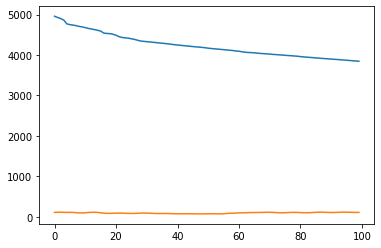

In [27]:
plt.figure()
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

In [32]:
pred = model_1.predict(x_test)
print(pred)

[[-5.225573 ]
 [-5.4795084]
 [-5.6902437]
 [-5.723073 ]
 [-5.458869 ]
 [-5.674428 ]]


In [30]:
print(y_test.values)

[2.5  0.75 0.32 0.24 0.82 0.35]


*Conclution: The prediction data were very far to the real data, perhaps the model can´t give a exact result because the dimension of the data train are too short*